# <font color= blue> UCSanDiegoX-s-Data-Science-MicroMasters </font> #
## Week-7 of Course 1-Python For Data Science ##
### MACHINE LEARNING -REGRESSION ###
Regression model predicts the numerical value. it works on princple of y=mx+c. Training a linear regression model means adjusting these parameters(y,m,b,c) to fit the regression line to the samples. The regression line can be determined using what's referred to as the least squares method. The least squares method finds the regression line
that makes the sum of the residuals as small as possible. The goal of linear regression then, is to find the best-fitting straight line through the samples using the least squares method.
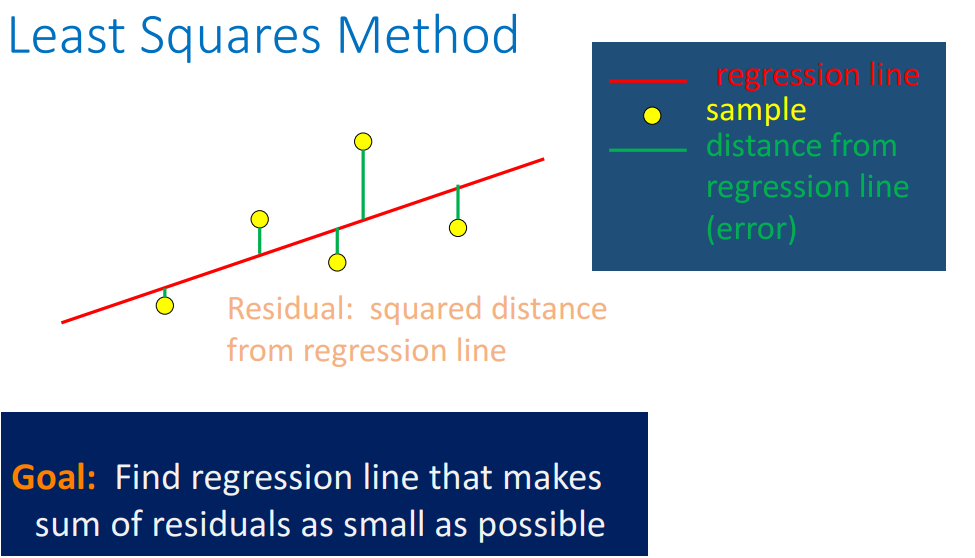

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>
Regresssion with scikit-learn<br><br> using Soccer Dataset
<br><br></p>


We will again be using the open dataset from the popular site <a href="https://www.kaggle.com">Kaggle</a> that we used in Week 1 for our example. 

Recall that this <a href="https://www.kaggle.com/hugomathien/soccer">European Soccer Database</a> has more than 25,000 matches and more than 10,000 players for European professional soccer seasons from 2008 to 2016. 

**Note:** Please download the file *database.sqlite* if you don't yet have it in your *Week-7-MachineLearning* folder.

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Import Libraries<br><br></p>


In [4]:
import sqlite3
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Read Data from the Database into pandas
<br><br></p>


In [2]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [5]:
df.shape

(183978, 42)

In [6]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Declare the Columns You Want to Use as Features
<br><br></p>


In [7]:
features = [
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Specify the Prediction Target
<br><br></p>


In [8]:
target = ['overall_rating']

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Clean the Data<br><br></p>


In [9]:
df = df.dropna()

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Extract Features and Target ('overall_rating') Values into Separate Dataframes
<br><br></p>


In [10]:
X = df[features]

In [13]:
X

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,85.0,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,80.0,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,80.0,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,81.0,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [11]:
y = df[target]

Let us look at a typical row from our features: 

In [16]:
X.iloc[2]

potential             66.0
crossing              49.0
finishing             44.0
heading_accuracy      71.0
short_passing         61.0
volleys               44.0
dribbling             51.0
curve                 45.0
free_kick_accuracy    39.0
long_passing          64.0
ball_control          49.0
acceleration          60.0
sprint_speed          64.0
agility               59.0
reactions             47.0
balance               65.0
shot_power            55.0
jumping               58.0
stamina               54.0
strength              76.0
long_shots            35.0
aggression            63.0
interceptions         41.0
positioning           45.0
vision                54.0
penalties             48.0
marking               65.0
standing_tackle       66.0
sliding_tackle        69.0
gk_diving              6.0
gk_handling           11.0
gk_kicking            10.0
gk_positioning         8.0
gk_reflexes            8.0
Name: 2, dtype: float64

Let us also display our target values: 

In [17]:
y

,overall_rating
0,67.0
1,67.0
2,62.0
3,61.0
4,61.0
...,...
183973,83.0
183974,78.0
183975,77.0
183976,78.0


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Split the Dataset into Training and Test Datasets
<br><br></p>


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

(1) Linear Regression: Fit a model to the training set
<br><br></p>


In [20]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Perform Prediction using Linear Regression Model
<br><br></p>


In [21]:
y_prediction = regressor.predict(X_test)
y_prediction

array([[66.51284879],
       [79.77234615],
       [66.57371825],
       ...,
       [69.23780133],
       [64.58351696],
       [73.6881185 ]])

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

What is the mean of the expected target value in test set ?
<br><br></p>


In [22]:
y_test.describe()

,overall_rating
count,59517.000000
mean,68.635818
std,7.041297
min,33.000000
25%,64.000000
50%,69.000000
75%,73.000000
max,94.000000


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Evaluate Linear Regression Accuracy using Root Mean Square Error

<br><br></p>


In [23]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [24]:
print(RMSE)

2.8053030468552103


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

(2) Decision Tree Regressor: Fit a new regression model to the training set
<br><br></p>


In [25]:
regressor = DecisionTreeRegressor(max_depth=20)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Perform Prediction using Decision Tree Regressor
<br><br></p>


In [26]:
y_prediction = regressor.predict(X_test)
y_prediction

array([63.        , 84.        , 62.38666667, ..., 71.        ,
       62.        , 72.        ])

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

For comparision: What is the mean of the expected target value in test set ?
<br><br></p>


In [27]:
y_test.describe()

,overall_rating
count,59517.000000
mean,68.635818
std,7.041297
min,33.000000
25%,64.000000
50%,69.000000
75%,73.000000
max,94.000000


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Evaluate Decision Tree Regression Accuracy using Root Mean Square Error

<br><br></p>


In [28]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [29]:
print(RMSE)

1.4491466044626
